# Installing background stars

In [14]:
from astroquery.gaia import Gaia
from matplotlib import pyplot as plt
import pandas as pd
import astropy.units as u
import numpy as np

In [9]:
ra = 220.102540961
dec = -60.8330381775

CONICAL_QUERY = """
SELECT
    TOP 12000
    ra, dec, phot_g_mean_flux AS flux
FROM
    gaiadr3.gaia_source
WHERE
    CONTAINS(POINT('', ra, dec), CIRCLE('', {}, {}, {})) = 1 AND
    phot_g_mean_flux IS NOT NULL
"""

bg_stars = Gaia.launch_job(CONICAL_QUERY.format(ra, dec, 3.0)).get_results()
# bg_stars = np.delete(bg_stars, np.where(bg_stars['flux'] == bg_stars['flux'].max()), axis=0)
# bg_stars = np.delete(bg_stars, np.where(bg_stars['flux'] == bg_stars['flux'].max()), axis=0)

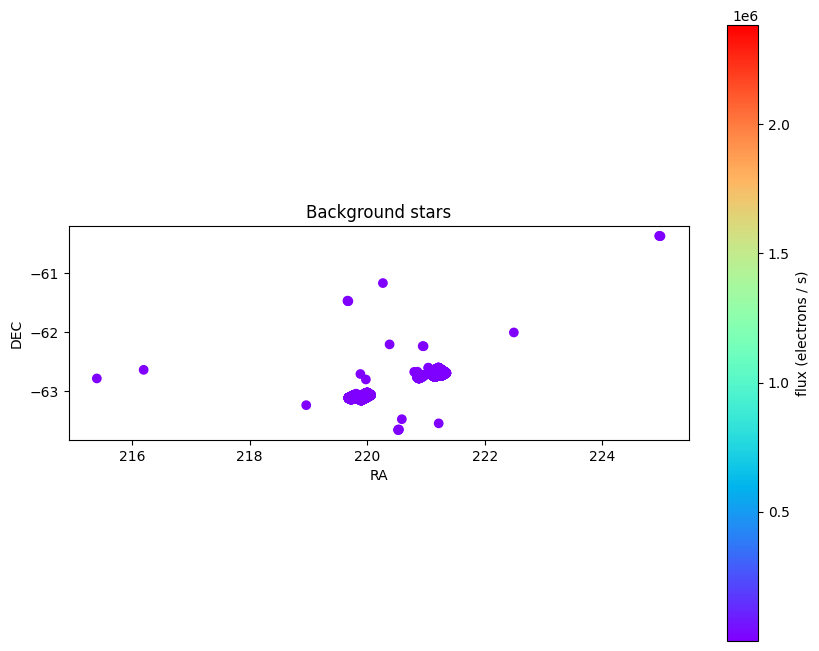

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
c=ax.scatter(bg_stars['ra'], bg_stars['dec'],
             # s= 10 * (1 + bg_stars['flux']/bg_stars['flux'].max())**10,
             c=bg_stars['flux'],
             cmap='rainbow',
             )

ax.set(xlabel='RA',
       ylabel='DEC',
       # xlim = (ra-3, ra+3),
       # ylim = (dec-3, dec+3),
       title='Background stars',
       aspect = 'equal',
       )

fig.colorbar(c, label='flux (electrons / s)')
plt.show()

In [12]:
import toliman
toliman._simulate_background_stars()

FileNotFoundError: [Errno 2] No such file or directory: 'toliman/assets'

In [22]:
df = pd.read_table('data/bsc5.dat')
# TODO read_fwf?
print(df)

        1          BD+44 4550      3 36042          46           000001.1+444022000509.9+451345114.44-16.88 6.70  +0.07 +0.08         A1Vn               -0.012-0.018      -018      195  4.2  21.6AC   3
0        2          BD-01 4525      6128569         ...                                                                                                                                                  
1        3 33    PscBD-06 6357     281285721002I    ...                                                                                                                                                  
2        4 86    PegBD+12 5063     87 917012004     ...                                                                                                                                                  
3        5          BD+57 2865    123 21085         ...                                                                                                                                         